<a href="https://colab.research.google.com/github/bs3537/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Bhav_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

###Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) that reproduces the example from lecture

In [0]:
#STEP 1:

# Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) that reproduces the example from lecture, and use it to calculate and visualize a range of situations
# Breathalyzer tests
# True positive rate = 100% = [(P(Positive/Drunk))] = probab_positive_drunk
# Prior Rate of drunk driving = 1 in 1000 (0.001) = P (Drunk) = probab_drunk_prior
# False positive rate = 8% = P (Positive) = probab_positive

In [0]:
import numpy as np


In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive_drunk, prob_positive):
  return (prob_drunk_prior * prob_positive_drunk) / prob_positive

In [0]:
# scenario for breathalyzer test in the lecture
prob_drunk_given_positive(0.001, 1, 0.08)

0.0125

In [0]:
# Another scenario with different values for true positive and false positive rate

prob_drunk_given_positive(0.001, 0.8, 0.1)

# The probability of being positive drunk is still very low due to same input for very low prevalence of found drunk in the general population i.e. the prior which is a very important input in Bayesian statistics

0.008

### ****Python Program for Bayesian Theorem applied to Breathalyzer test****

In [0]:
# ****Python Program for Bayesian Theorem applied to Breathalyzer test****

print("Enter 'x' for exit.");

print("Enter prob_drunk_prior or population incidence of drunk driving in fractions: press enter after entering number ");
num1 = input();
print("probab_positive_drunk or True positive rate in fractions: press enter after entering number");
num2 = input();
print("prob_positive or False positive rate in fractions: press enter after entering number");
num3 = input();

if num1 == 'x':
    exit();
    
else:
    res = float(num1) * float(num2) / float(num3)
    print ("prob_drunk_given_positive in fractions=", res)
    
  
   

Enter 'x' for exit.
Enter prob_drunk_prior or population incidence of drunk driving in fractions: press enter after entering number 
0.001
probab_positive_drunk or True positive rate in fractions: press enter after entering number
1
prob_positive or False positive rate in fractions: press enter after entering number
0.08
prob_drunk_given_positive in fractions= 0.0125


### STEP 2:
### Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [0]:
# STEP 2:
# Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/bs3537/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/master/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [0]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [0]:
df2 = df[df['country'] == 'United States']
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [0]:
df2.shape

(372, 12)

In [0]:
df2.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

In [0]:
df2['year'].max()

2015

In [0]:
df2_1 = df2['suicides/100k pop'].describe()
print ("Summary statistics for the U.S. population suicide rate/100K pop in all age groups for 1985 to 2015", df2_1)

Summary statistics for the U.S. population suicide rate/100K pop in all age groups for 1985 to 2015 count    372.000000
mean      13.819812
std       13.229875
min        0.260000
25%        3.972500
50%        6.890000
75%       23.305000
max       58.950000
Name: suicides/100k pop, dtype: float64


In [0]:
# isolating U.S. suicide number data across all age groups for 1985-2015.
df2_1_1 = df2['suicides/100k pop']
df2_1_1.head()

26848    53.57
26849    29.50
26850    24.46
26851    22.77
26852    21.38
Name: suicides/100k pop, dtype: float64

In [0]:
df2_1_1.shape

(372,)

In [0]:
df3 = df2[df2['year'] == 2015]
df3.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27208,United States,2015,male,75+ years,3171,8171136,38.81,United States2015,NaN,"18,120,714,000,000",60387,Silent
27209,United States,2015,male,55-74 years,9068,32264697,28.11,United States2015,NaN,"18,120,714,000,000",60387,Boomers
27210,United States,2015,male,35-54 years,11634,41658010,27.93,United States2015,NaN,"18,120,714,000,000",60387,Generation X
27211,United States,2015,male,25-34 years,5503,22137097,24.86,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27212,United States,2015,male,15-24 years,4359,22615073,19.27,United States2015,NaN,"18,120,714,000,000",60387,Millenials


In [0]:
df4= df3['suicides/100k pop'].describe()
print ("Summary statistics for the U.S. population suicide rate/100k pop in all age groups for 2015", df4)

Summary statistics for the U.S. population suicide rate/100k pop in all age groups for 2015 count    12.000000
mean     14.617500
std      12.646263
min       0.780000
25%       5.067500
50%       8.970000
75%      25.627500
max      38.810000
Name: suicides/100k pop, dtype: float64


In [0]:
# isolating U.S. suicide rate/100k pop. data across all age groups for 2015.
df5= df3['suicides/100k pop']
df5.head()

27208    38.81
27209    28.11
27210    27.93
27211    24.86
27212    19.27
Name: suicides/100k pop, dtype: float64

In [0]:


df6 = df2[df2['year'] == 1985]
df6.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [0]:
# isolating U.S. suicide number data across all age groups for 1985.
df7 = df6['suicides/100k pop']
df7.head()

26848    53.57
26849    29.50
26850    24.46
26851    22.77
26852    21.38
Name: suicides/100k pop, dtype: float64

In [0]:
df8= df6['suicides/100k pop'].describe()
print ("Summary statistics for the U.S. population suicide rate/100k pop in all age groups for 1985", df8)

Summary statistics for the U.S. population suicide rate/100k pop in all age groups for 1985 count    12.000000
mean     15.393333
std      15.597443
min       0.440000
25%       5.515000
50%       7.460000
75%      23.192500
max      53.570000
Name: suicides/100k pop, dtype: float64


## t test

In [0]:
# Null hypothesis is that the average number of suicides for the U.S. in 2015 is not different from that in 1985.

from scipy import stats
 

In [0]:
# First using t test

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
ttest_ind(df5, df7, equal_var=False)

Ttest_indResult(statistic=-0.1338426064235618, pvalue=0.8947955182545053)

In [0]:
# Using t test, the null hypthesis is true and there is no difference in the number of suicide rate/100 k pop. across all age groups in the U.S. in 2015 vs. 1985 (p value is >0.05)

### Applying frequentist method to calculate mean, variance and std dev for GDP per capita in 1985-2015 population sample

In [0]:
df8 = df2['gdp_per_capita ($)']
df8.head()

26848    19693
26849    19693
26850    19693
26851    19693
26852    19693
Name: gdp_per_capita ($), dtype: int64

In [0]:
df8.isnull().sum()

0

In [0]:
df8.describe()

count      372.000000
mean     39269.612903
std      12334.117581
min      19693.000000
25%      27760.000000
50%      39218.000000
75%      51585.000000
max      60387.000000
Name: gdp_per_capita ($), dtype: float64

In [0]:
mean = np.mean(df8)
mean

39269.6129032258

In [0]:
# standard deviation using frequentist approach
std = np.std(df8, ddof=1)
std

12334.117580785927

In [0]:
var = np.var(df8)
var

151721503.65660775

In [0]:
sample_size = 372


In [0]:
std_err = std/np.sqrt(sample_size)
std_err

639.494206420015

In [0]:
t = 1.984 # 95% confidence
(mean, mean - t*std_err, mean + t*std_err)
# The output gives the mean and 95% C.I. by frequentist approach.

(39269.6129032258, 38000.85639768849, 40538.369408763116)

In [0]:
#using df.describe function to compare summary stats for 1985-2016 U.S. GDP per capita

df8.describe()

# The mean and std. deviation match that calculated using above numpy functions

count      372.000000
mean     39269.612903
std      12334.117581
min      19693.000000
25%      27760.000000
50%      39218.000000
75%      51585.000000
max      60387.000000
Name: gdp_per_capita ($), dtype: float64

###Applying Bayesian method to calculate mean, variance and std dev for 1985-2016 U.S. GDP per capita

In [0]:

# Bayesian method, using alpha =0.95, for measuring 95% confidence intervals
# this function also returns the confidence intervals.

stats.bayes_mvs(df8, alpha=0.95)

# first line of the output gives the mean and 95% CI using Bayesian method

(Mean(statistic=39269.6129032258, minmax=(38012.12505108928, 40527.10075536233)),
 Variance(statistic=152955011.8164175, minmax=(132409278.74174349, 176635676.78271937)),
 Std_dev(statistic=12359.121987835366, minmax=(11506.92307881405, 13290.435537736126)))

### Conclusions:
### Mean is the same and 95% confidence intervals are almost the same using frequentist and Bayesian statistics.
### Variance is slightly higher for Bayesian method but can be considered almost similar.
### Standard deviation is slightly higher for Bayesian method but can be considered almost similar.

###Plotting histogram showing the means and distribution of 2015 suicide rate dataset by frequentist and Bayesian methods.

In [0]:

# frequentist and Bayesian approach means are same = 2453.83

means = 39269.61, 39269.61

# standard deviation by frequentist method = 12334.11
# standard deviation by Bayesian method = 12359.12

stdevs = 12334.11, 12359.12
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['frequentist', 'Bayesian'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

    


,frequentist,Bayesian
min,-3623.15,-1291.13
max,79032.95,85028.64
mean,39853.88,40113.72
std,12610.43,12768.43


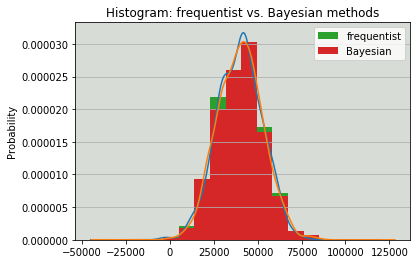

In [0]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: frequentist vs. Bayesian methods')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')


### The histogram shows almost similar distribution by both frequentist and Bayesian methods

### The difference in the two methods is the way in which their practictioners interpret the confidence intervals which is explained below. Other differences are also discussed below.


###In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist statistics relies on a confidence interval (C.I.) while tring to estimate the value of an unknown parameter in a sample, while the Bayesian approach relies on a credible region (C.R.). Frequentists consider probability as a measure of the frequency of repeated events while Bayesians consider probability as a measure of the degree of certainty about values. frequentists consider model parametrs to be fixed and the data to be random, while Bayesians consider model parametrs to be random and data to be fixed.
In the Bayesian formula, the posterior input on mean is exactly equal to the frequentist sampling distribution for mean (as above example of suicide rate as shown). The confidence intervals calculated by the two methods are also similar but their interpretation is different. 
Frequentist confidence interval interpretation = There is 95% probability that an unknown variable from this sample has mean within the two confidence intervals.
Bayesian confidence interval interpretation = Given our observed data, there is a 95% probability that the true value of mean falls within these two confidence intervals.

The Bayesian interpreation is thus a statement of probability about the parameter value given fixed bounds. The frequentist solution is a probability about the bounds given a fixed parameter value.

The Bayesian approach fixes the credible region and guarantees that 95$ of possible values of mean will fall withn it. The frequentist approach fixes the parameter and guarantees that 95% of possible confidence intervals will contain it.

In most scientific applications, frequentism is answering the wrong question while analyzing what a particular observed set of data is telling us. Still, frequentism continues to be be the standard approach when submitting papers, etc. to scientific journals or doing drug trials, etc. since reviewers look for p values calculated using frequentist approach.

####Bayesian approach relies heavily on prior information while frequentist approach does not rely on prior information.









## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)